In [179]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [180]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
from scipy.misc import toimage
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
import PIL

In [181]:
import warnings
warnings.filterwarnings("ignore")

In [182]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

# Exploring the CIFAR-10 dataset

In [183]:
metaDataPath = 'dataset/cifar-10-batches-py/batches.meta'
metaData = unpickle(metaDataPath)
label_names_bin = 'label_names'.encode('utf-8')
labelNames = metaData[label_names_bin]
labelNames = [x.decode() for x in labelNames]
labelNames

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

## Control Flags

In [184]:
data_aug = True 

## Easier way to load data using torch

In [185]:
data_aug_transforms = []

if data_aug == True:

    data_aug_transforms = [
        transforms.RandomCrop((32,32), padding=4),
#         transforms.RandomHorizontalFlip(),
#         transforms.RandomRotation(15),
#         transforms.RandomAffine(degrees=0, translate=(.3,.7)),
#         transforms.ColorJitter(
#                 brightness=float(0.1*np.random.rand(1)),
#                 contrast=float(0.1*np.random.rand(1)),
#                 saturation=float(0.1*np.random.rand(1)),
#                 hue=float(0.1*np.random.rand(1))),
#         
#         transforms.Resize((224,224)),
        transforms.ColorJitter(hue=.25, saturation=.25),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(20, resample=PIL.Image.BILINEAR),
        transforms.RandomGrayscale(p=0.1)
                    ]

In [186]:
norm_transform = transforms.Compose(data_aug_transforms+[transforms.ToTensor(),
                                     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                     ])
test_transform = transforms.Compose([transforms.ToTensor(),
                                     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                     ])

In [187]:
cifar_dataset = torchvision.datasets.CIFAR10(root='dataset/',
                                           train=True,
                                           transform=norm_transform,
                                           download=False)

test_dataset = torchvision.datasets.CIFAR10(root='dataset/',
                                          train=False,
                                          transform=test_transform)

In [188]:
cifar_dataset

Dataset CIFAR10
    Number of datapoints: 50000
    Split: train
    Root Location: dataset/
    Transforms (if any): Compose(
                             RandomCrop(size=(32, 32), padding=4)
                             ColorJitter(brightness=None, contrast=None, saturation=[0.75, 1.25], hue=[-0.25, 0.25])
                             RandomHorizontalFlip(p=0.5)
                             RandomRotation(degrees=(-20, 20), resample=2, expand=False)
                             RandomGrayscale(p=0.1)
                             ToTensor()
                             Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
                         )
    Target Transforms (if any): None

In [189]:
test_dataset

Dataset CIFAR10
    Number of datapoints: 10000
    Split: test
    Root Location: dataset/
    Transforms (if any): Compose(
                             ToTensor()
                             Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
                         )
    Target Transforms (if any): None

Image in the train dataset has shape: torch.Size([3, 32, 32])
Label corresponding to image is: 9
Label  9 is: truck


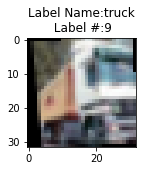

In [190]:
exampleNumber = 1
img = cifar_dataset[exampleNumber][0]
num = cifar_dataset[exampleNumber][1]
name = cifar_dataset.classes[num]

print('Image in the train dataset has shape:',img.size())
print('Label corresponding to image is:',num)
print('Label ',num,'is:',name)

img = np.rollaxis(np.array(img),0,3)

plt.figure(figsize=(2,2))
plt.title('Label Name:'+ name+ '\n Label #:'+str(num))
plt.imshow(toimage(img))
plt.show()

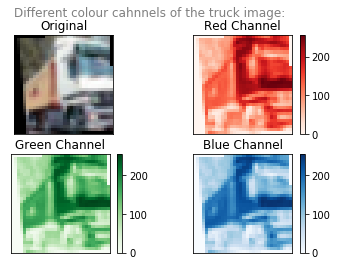

In [191]:
b,g,r = cv2.split(img)
r = toimage(r)
g=toimage(g)
b = toimage(b)

fig, axs = plt.subplots(2,2)

cax_00 = axs[0,0].imshow(toimage(img))
axs[0,0].set_title('Original')
axs[0,0].set_xticks([])
axs[0,0].set_yticks([])

cax_01 = axs[0,1].imshow(r, cmap='Reds')
axs[0,1].set_title('Red Channel')
axs[0,1].set_xticks([])
axs[0,1].set_yticks([])
fig.colorbar(cax_01, ax=axs[0,1])

cax_10 = axs[1,0].imshow(g, cmap='Greens')
axs[1,0].set_title('Green Channel')
axs[1,0].set_xticks([])
axs[1,0].set_yticks([])
fig.colorbar(cax_10, ax=axs[1,0])

cax_11 = axs[1,1].imshow(b, cmap='Blues')
axs[1,1].set_title('Blue Channel')
axs[1,1].set_xticks([])
axs[1,1].set_yticks([])
fig.colorbar(cax_11, ax=axs[1,1])

plt.suptitle('Different colour cahnnels of the '+ name+ ' image:', color ='gray')
plt.show()

In [192]:
r = np.array(r).flatten()
g = np.array(g).flatten()
b = np.array(b).flatten()

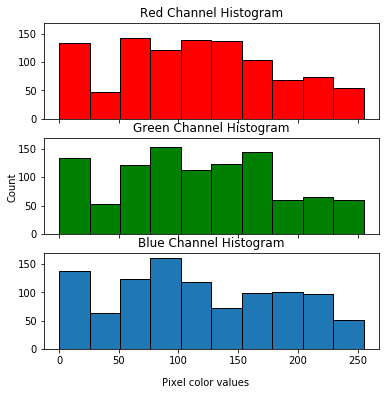

In [193]:
# Plot histograms
fig, axs = plt.subplots(3, sharex=True, sharey=True, figsize=(6,6))
fig.text(0.5, 0.04, 'Pixel color values', ha='center')
fig.text(0.04, 0.5, 'Count', va='center', rotation='vertical')

axs[0].hist(r, bins=10, color='red', ec='black')
axs[0].set_title('Red Channel Histogram')
axs[1].hist(g.ravel(), bins=10, color='green', ec='black')
axs[1].set_title('Green Channel Histogram')
axs[2].hist(b.ravel(), bins=10, ec='black')
axs[2].set_title('Blue Channel Histogram')

plt.show()

## Visualizing all class members

In [194]:
def classMembers(dataset, numMembersOfEachClass = 2):
    
    imagesOfEachClass = {}
    
    for label in range(10):
        imagesOfEachClass[label] = []
        for i in range(numMembersOfEachClass):
            rand = random.randint(0, len(dataset))
            while dataset[rand][1] != label:
                rand = random.randint(0, len(dataset))
            img = dataset[rand][0]
            imagesOfEachClass[label].append(img)
    return imagesOfEachClass

def visualizeClassMembers(imagesOfEachClass, datasetLabelNames):
    rows = len(imagesOfEachClass)
    cols = len(imagesOfEachClass[1])
    
    fig, axs = plt.subplots(figsize=(32.0, 32.0), nrows=rows, ncols=cols)
#     gs1 = gridspec.GridSpec(4, 4)
#     gs1.update(wspace=0.005, hspace=0.005) # set the spacing between axes.
    
    for r in range(rows):
        for c in range(cols):
            img = imagesOfEachClass[r][c-1]
            img = np.rollaxis(np.array(img),0,3)
            col = axs[r,c]
            col.imshow(toimage(img))
            col.set_title(datasetLabelNames[r])
            
    plt.subplots_adjust(wspace=0, hspace=0)
    fig.tight_layout()
    plt.show()
    
    return None

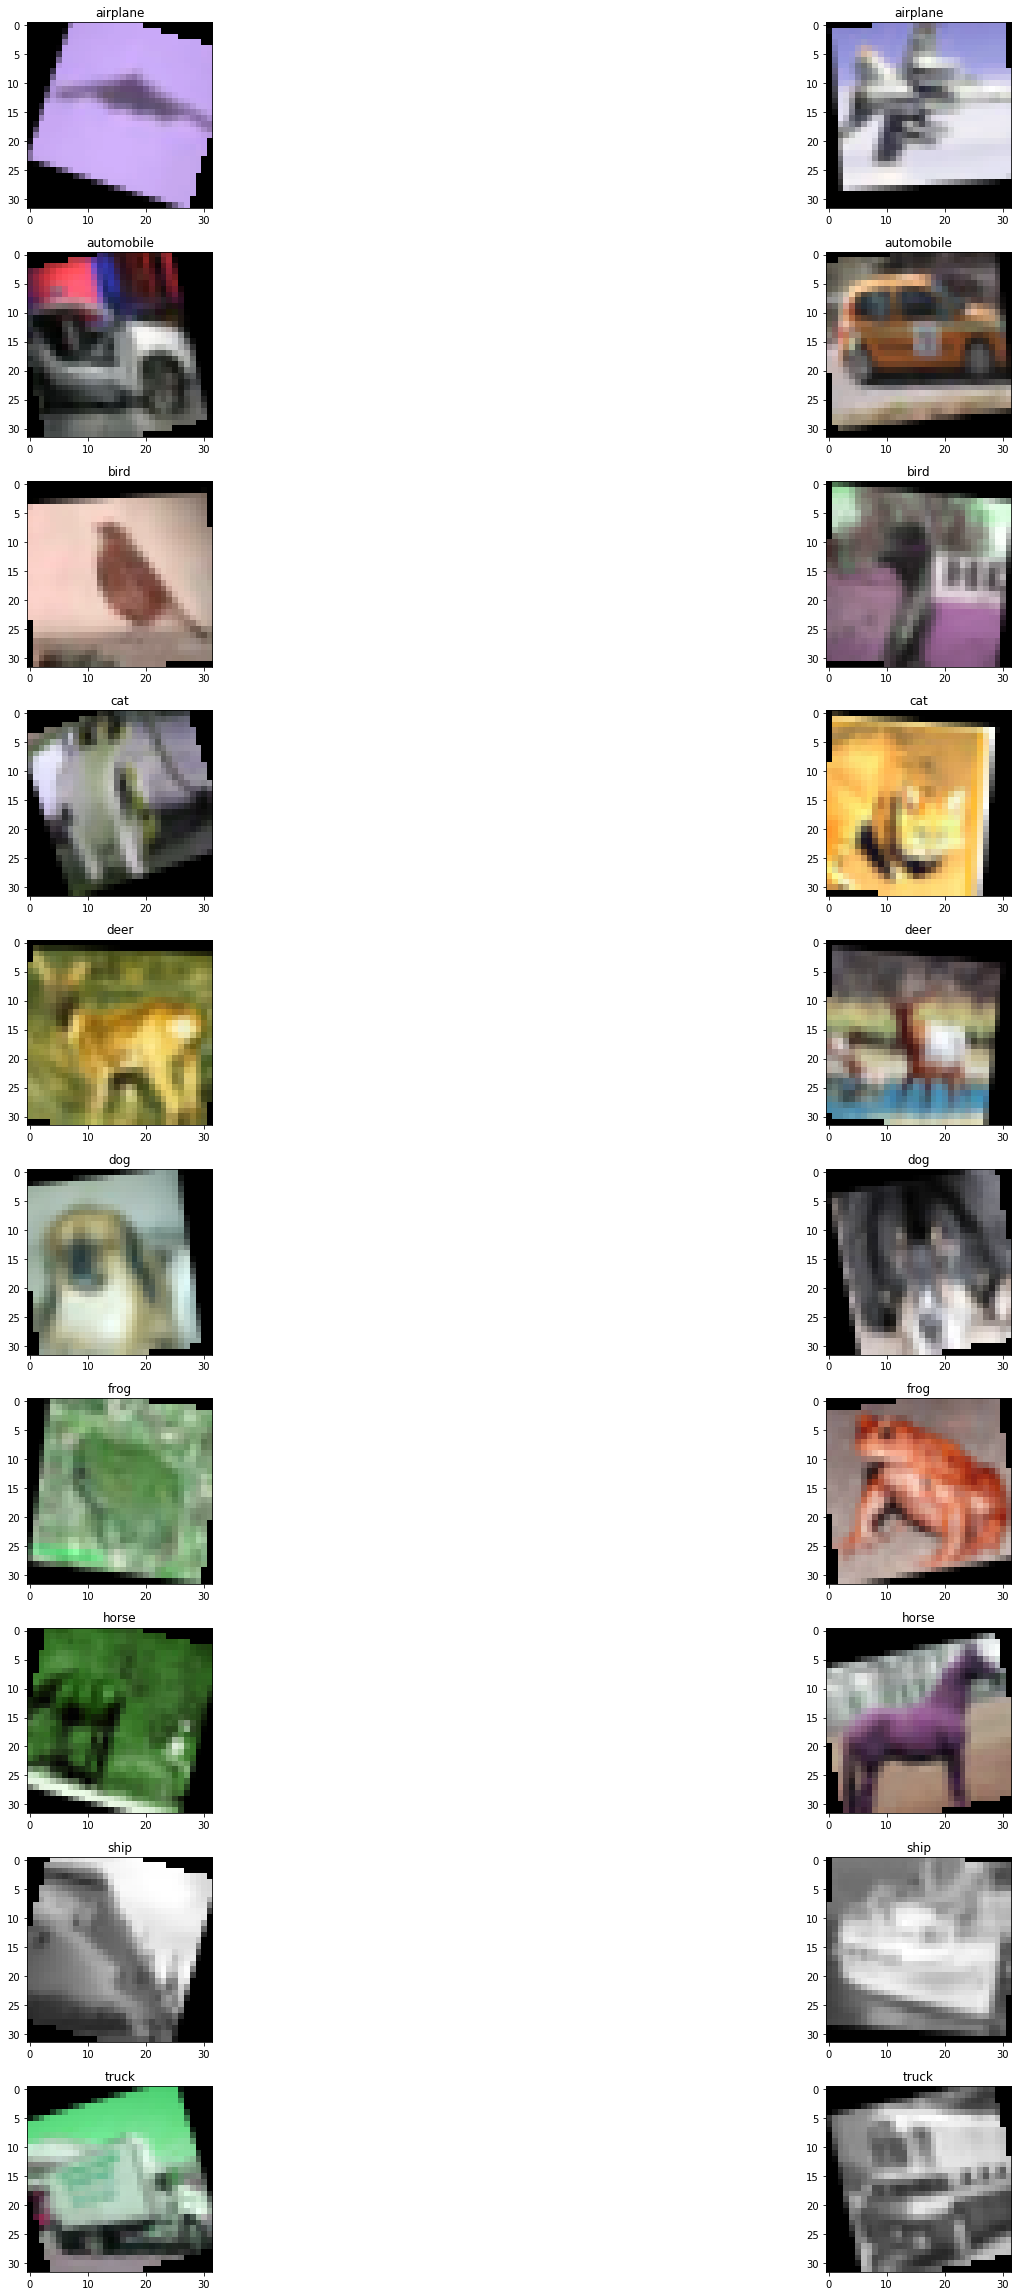

In [195]:
imagesOfEachClass = classMembers(cifar_dataset)
visualizeClassMembers(imagesOfEachClass, cifar_dataset.classes)

## Visualize Augmented data

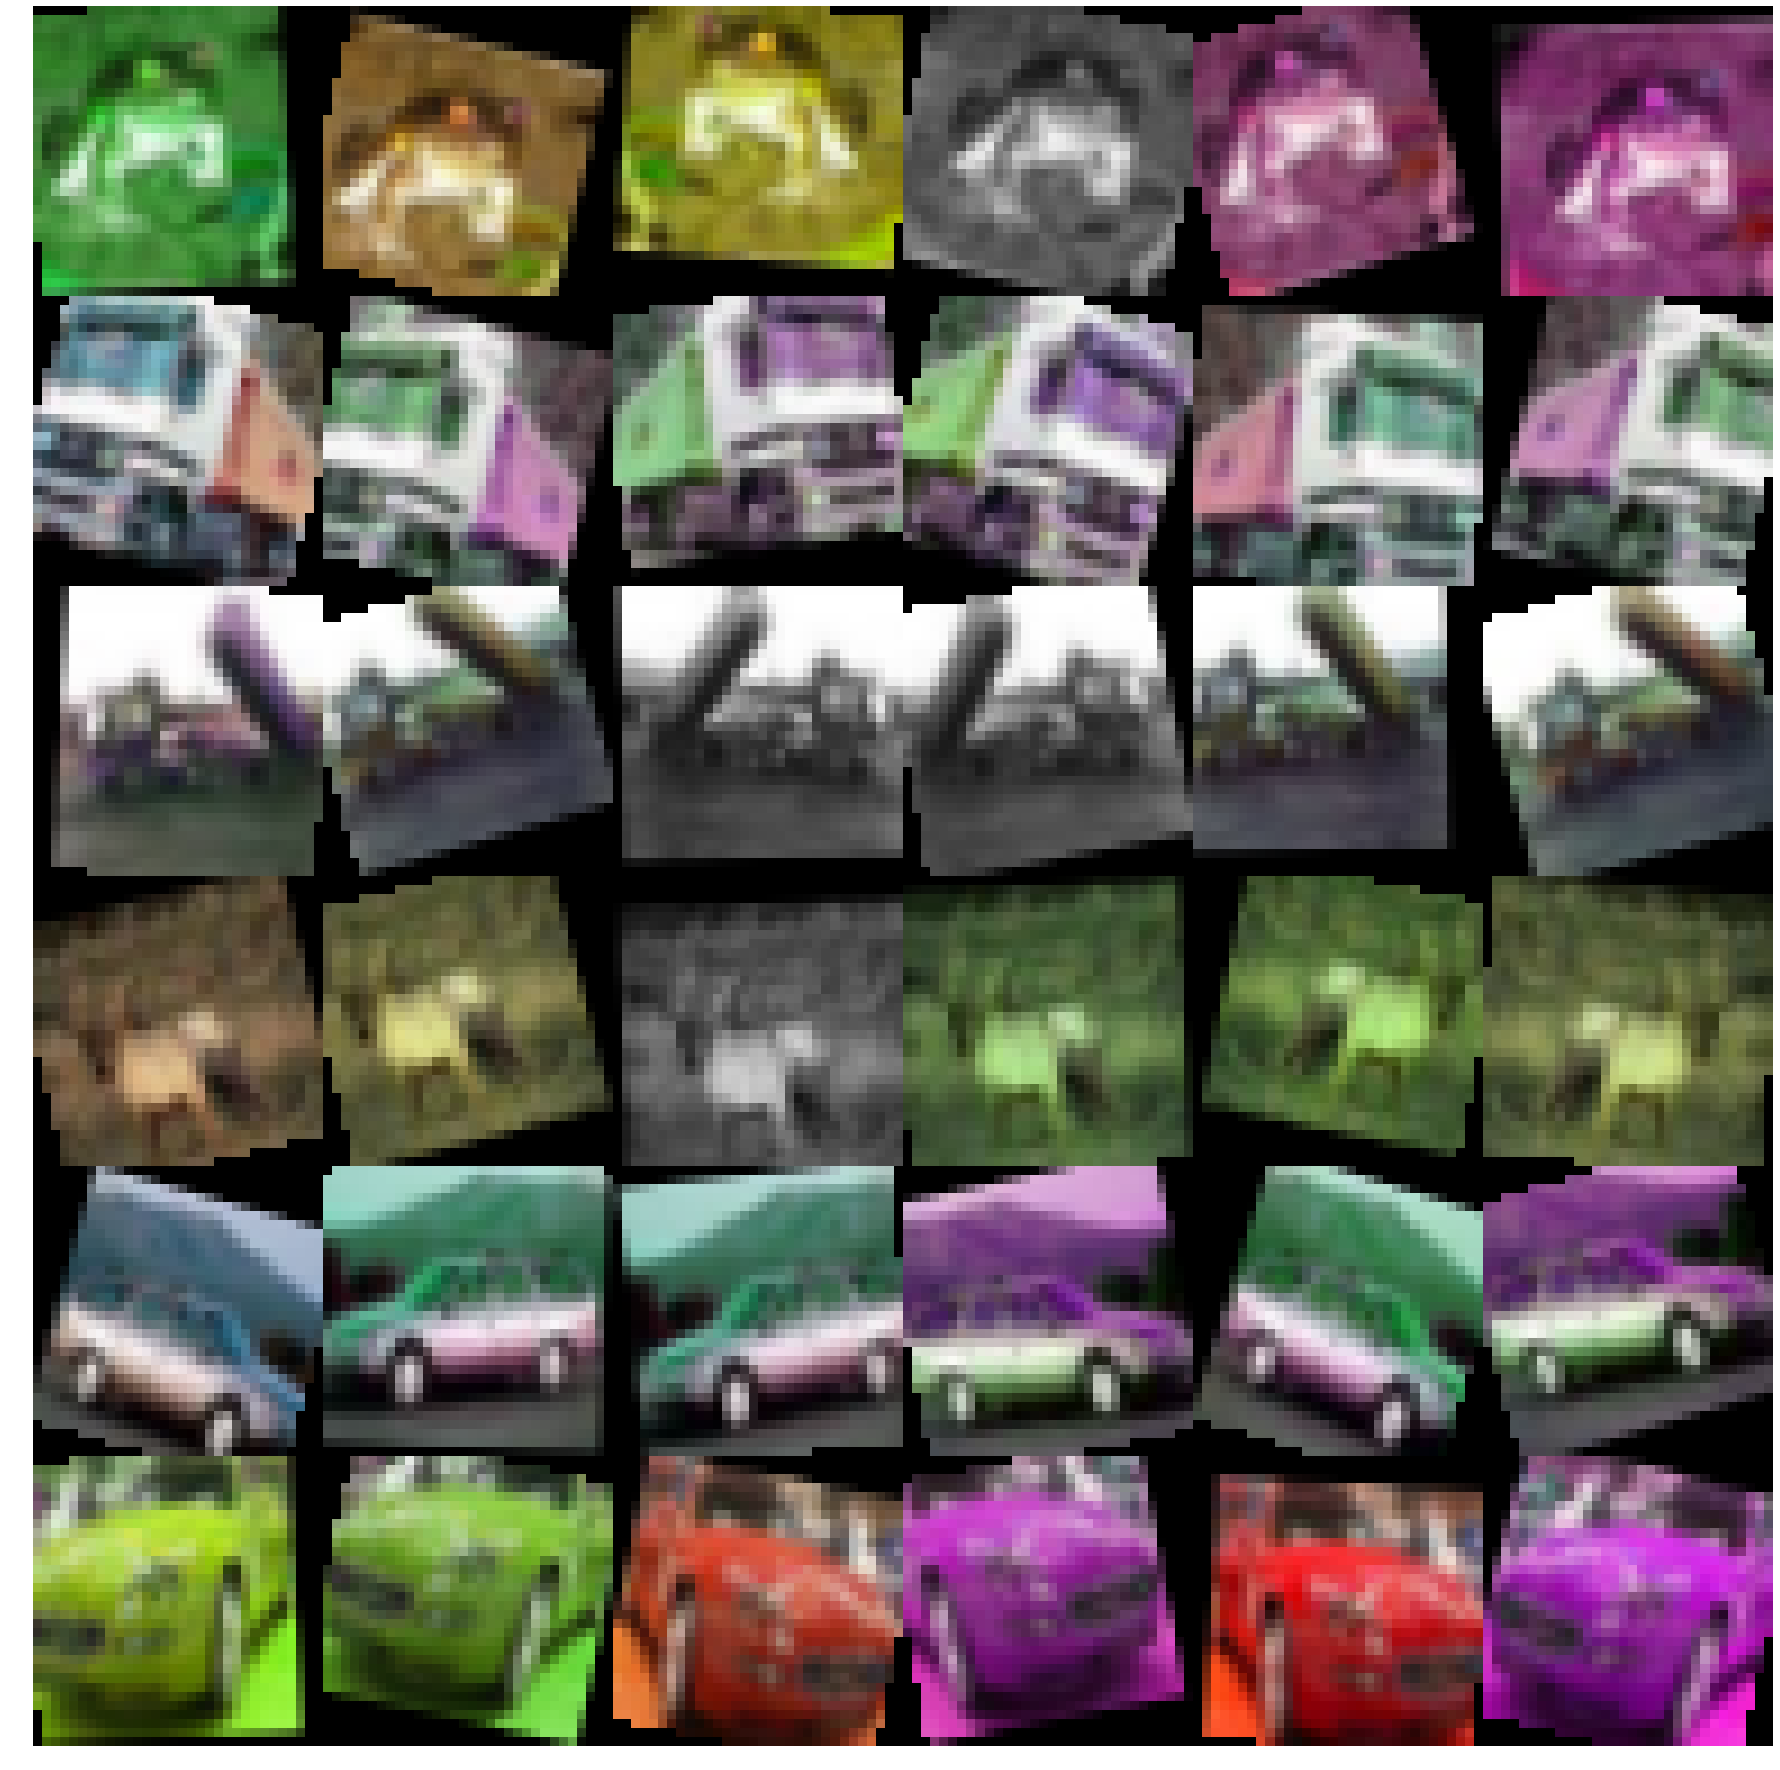

In [196]:
def show_dataset(dataset, n=6):
    img = np.vstack((np.hstack((np.asarray(np.rollaxis(np.array(dataset[i][0]),0,3)) for _ in range(n))) 
                     for i in range(n)))
    fig, axs = plt.subplots(1, figsize=(32,32))
    axs.imshow(toimage(img))
    plt.axis('off')

show_dataset(cifar_dataset)

## Visualizing distribution of different classes

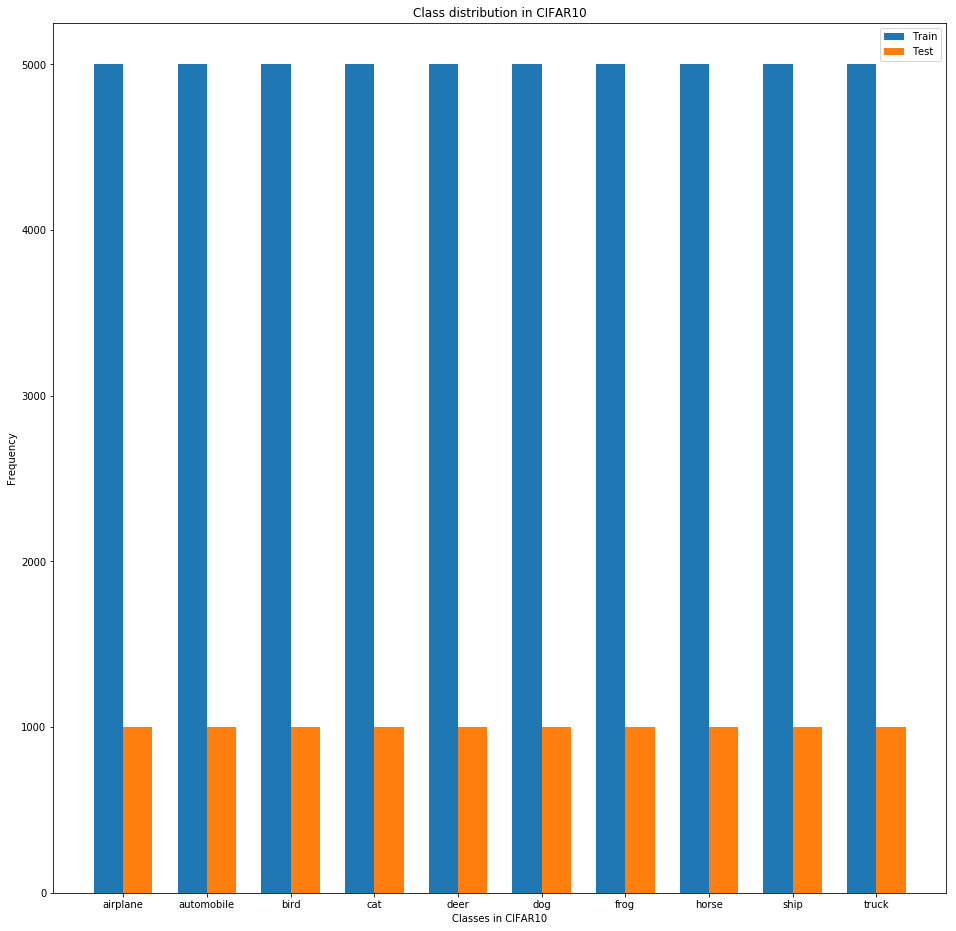

In [197]:
uniqueValuesTrain, occurCountTrain = np.unique(cifar_dataset.targets, return_counts=True)
uniqueValuesTest, occurCountTest = np.unique(test_dataset.targets, return_counts=True)

ind = np.arange(len(occurCountTrain))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(16,16))
rects1 = ax.bar(ind - width/2, occurCountTrain, width, 
                label='Train')
rects2 = ax.bar(ind + width/2, occurCountTest, width,
                label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frequency')
ax.set_xlabel('Classes in CIFAR10')
ax.set_title('Class distribution in CIFAR10')
ax.set_xticks(ind)
ax.set_xticklabels(cifar_dataset.classes)
ax.legend()
fig.show()

In [212]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import sys

In [213]:
def weights_init(m):
    if type(m) == nn.Linear:
        m.weight.data.normal_(0.0, 1e-3)
        m.bias.data.fill_(0.)

def update_lr(optimizer, lr):
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

In [214]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device: %s'%device)

Using device: cpu


In [291]:
input_size = 32 * 32 * 3
listOfHiddenSizes = [[50], [50, 40], [50, 40, 30], [50, 40, 30, 25], [50, 40, 30, 25, 20]]
num_classes = 10
num_epochs = 10
batch_size = 200
learning_rate = 1e-3
learning_rate_decay = 0.95
reg=0.001
num_training= 49000
num_validation =1000
train = True

In [292]:
mask = list(range(num_training))
train_dataset = torch.utils.data.Subset(cifar_dataset, mask)
mask = list(range(num_training, num_training + num_validation))
val_dataset = torch.utils.data.Subset(cifar_dataset, mask)

In [293]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

val_loader = torch.utils.data.DataLoader(dataset=val_dataset,
                                           batch_size=batch_size,
                                           shuffle=False)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

In [294]:
class MultiLayerPerceptron(nn.Module):
    def __init__(self, input_size, hidden_layers, num_classes):
        super(MultiLayerPerceptron, self).__init__()
    
        layers = []
        
        layers.append(nn.Linear(input_size, hidden_layers[0]))
        layers.append( nn.ReLU() )

        for i in range(1, len(hidden_layers)):
            
            layers.append( nn.Linear(hidden_layers[i-1], hidden_layers[i]) )
            layers.append( nn.ReLU() )
        
        layers.append( nn.Linear(hidden_layers[-1], num_classes) )
        
        self.layers = nn.Sequential(*layers)

    def forward(self, x):
        
        for i in range(len(self.layers)):
            x = self.layers[i](x)

        out = x
        return out

In [295]:
def run_training(model, train_loader, learning_rate, learning_rate_decay, num_epochs, early_stopping=True):
    
    model.apply(weights_init)

    # Loss and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=reg)

    # Train the model
    lr = learning_rate
    total_step = len(train_loader)
    
    valAcc = []
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_loader):
            # Move tensors to the configured device
            images = images.to(device)
            labels = labels.to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            outputs = model(images.reshape(batch_size,-1))
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            if (i+1) % 100 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                       .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

        # Code to update the lr
        lr *= learning_rate_decay
        update_lr(optimizer, lr)
        with torch.no_grad():
            correct = 0
            total = 0
            for images, labels in val_loader:
                images = images.to(device)
                labels = labels.to(device)
                predicted = model(images.reshape(batch_size,-1))
                _ , predicted = torch.max(predicted, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
            
            acc = 100*correct/total
            valAcc.append(acc)
            print('Validataion accuracy is: {} %'.format(acc))
            
            if early_stopping:
                if acc >= np.amax(valAcc):
                    torch.save(model.state_dict(), 'DNN_models/ES/model'+str(epoch+1)+'.ckpt')
                    
    best_id = np.argmax(valAcc)
#     model = ConvNet(input_size, hidden_size, num_classes, norm_layer=norm_layer).to(device)
    model.load_state_dict(torch.load('DNN_models/ES/model'+str(best_id+1)+'.ckpt'))
    
    return valAcc

In [303]:
def run_testing(model, test_loader):

    # Test the model
    # In test phase, we don't need to compute gradients (for memory efficiency)
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            
            outputs = model(images.reshape(batch_size,-1))
            _ , predicted = torch.max(outputs, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            if total == 1000:
                break
        testAcc = 100 * correct / total
        print('Accuracy of the network on the {} test images: {} %'.format(total, testAcc))
        
        return testAcc

In [304]:
def trainMultipleHiddenSizes(listOfHiddenSizes, visualizeES = False, visualizeLayers = False, train = False):
    
    bestESModelValAcc = []
    allValAccs = []
    for hid in range(len(listOfHiddenSizes)):
        print('#################################################')
        print('Training Model ', hid)

        hidden_size = listOfHiddenSizes[hid]

        model = MultiLayerPerceptron(input_size, hidden_size, num_classes).to(device)
        print(model)

        if train:
            valAcc = run_training(model, train_loader, learning_rate, learning_rate_decay, num_epochs)
            allValAccs.append(valAcc)
            bestESModelValAcc.append(np.max(np.array(valAcc)))
            
            # Save the model checkpoint
            torch.save(model.state_dict(), 'DNN_models/DNN_model'+str(hid)+'.ckpt')
    
    bestModel_ID = np.argmax(np.array(bestESModelValAcc))
    
    if visualizeES:
        valAcc = allValAccs[bestModel_ID]
        epochs = [int(i) for i in range(1, num_epochs+1)]
        ax = plt.figure().gca()
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))
        plt.plot(epochs,valAcc)
        plt.xlabel('number of epochs')
        plt.ylabel('validation accuracy')
        plt.show()
        
    if visualizeLayers:
        x=[i for i in range(1, len(listOfHiddenSizes)+1)]
        ax = plt.figure().gca()
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))
        plt.bar(x, bestESModelValAcc)
        plt.xlabel('Layers')
        plt.ylabel('Validation Accuracy')
        plt.show()
        
    return bestModel_ID

In [305]:
def testMultipleParamVals(paramVals, train=False, visualizeTestAcc = False):
    
    testAcc = []
    for hid in range(len(paramVals)):
        hidden_size = paramVals[hid]

        model = MultiLayerPerceptron(input_size, hidden_size, num_classes).to(device)
        if not train:
            # Run the test code once you have your by setting train flag to false
            # and loading the best model

            best_model = torch.load('DNN_models/DNN_model'+str(hid)+'.ckpt')
            model.load_state_dict(best_model)

            testAcc.append(run_testing(model, test_loader))
    
    if visualizeTestAcc:
        x=[i for i in range(1, len(paramVals)+1)]
        ax = plt.figure().gca()
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))
        plt.bar(x, testAcc)
        plt.xlabel('Models')
        plt.ylabel('Test accuracy')
        plt.show()
    

#################################################
Training Model  0
MultiLayerPerceptron(
  (layers): Sequential(
    (0): Linear(in_features=3072, out_features=50, bias=True)
    (1): ReLU()
    (2): Linear(in_features=50, out_features=10, bias=True)
  )
)
Epoch [1/10], Step [100/245], Loss: 2.1302
Epoch [1/10], Step [200/245], Loss: 1.9243
Validataion accuracy is: 30.7 %
Epoch [2/10], Step [100/245], Loss: 1.8604
Epoch [2/10], Step [200/245], Loss: 1.7947
Validataion accuracy is: 30.7 %
Epoch [3/10], Step [100/245], Loss: 1.8448
Epoch [3/10], Step [200/245], Loss: 1.8054
Validataion accuracy is: 33.8 %
Epoch [4/10], Step [100/245], Loss: 1.9714
Epoch [4/10], Step [200/245], Loss: 1.7882
Validataion accuracy is: 34.3 %
Epoch [5/10], Step [100/245], Loss: 1.6731
Epoch [5/10], Step [200/245], Loss: 1.7742
Validataion accuracy is: 37.5 %
Epoch [6/10], Step [100/245], Loss: 1.7500
Epoch [6/10], Step [200/245], Loss: 1.6347
Validataion accuracy is: 36.1 %
Epoch [7/10], Step [100/245], Loss

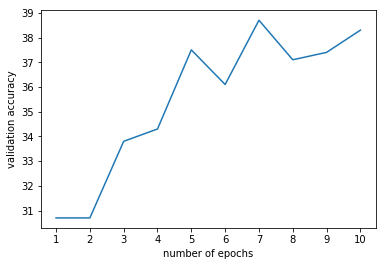

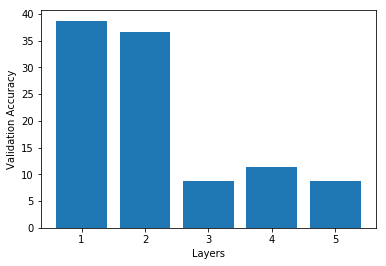

In [306]:
listOfHiddenSizes = [[50], [50, 40], [50, 40, 30], [50, 40, 30, 25], [50, 40, 30, 25, 20]]
train = True
bestModel_ID = trainMultipleHiddenSizes(listOfHiddenSizes, visualizeES = True, visualizeLayers = True, train= train)



In [307]:
train = False

Accuracy of the network on the 1000 test images: 42.0 %
Accuracy of the network on the 1000 test images: 38.2 %
Accuracy of the network on the 1000 test images: 10.3 %
Accuracy of the network on the 1000 test images: 10.6 %
Accuracy of the network on the 1000 test images: 10.3 %


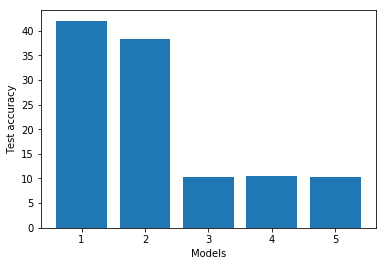

In [308]:
testMultipleParamVals(listOfHiddenSizes, train=train, visualizeTestAcc = True)

In [ ]:
import seaborn as sns
import sklearn

def display_classification_results(y_test, y_pred,title="Accuracy Heatmap",show_report=True):
    print("Test accuracy: %.2f%%"%(sklearn.metrics.accuracy_score(y_test, y_pred)*100))
    if show_report:
        print("Classification Report:\n",sklearn.metrics.classification_report(y_test, y_pred))
    plt.rcParams['figure.figsize'] = (10.0, 8.0)
    conf_mat = sklearn.metrics.confusion_matrix(y_test,y_pred)
    print("Confusion Matrix:\n",conf_mat)
    ax = sns.heatmap(conf_mat);
    ax.set(title=title, xlabel="Digits", ylabel="Digits")

In [309]:
bestmodel = MultiLayerPerceptron(input_size, listOfHiddenSizes[bestModel_ID], num_classes).to(device)
bestmodel.load_state_dict(torch.load('DNN_models/DNN_model'+str(bestModel_ID)+'.ckpt'))